# Alunos
* Arthur Severo
* Victor Le Roy

## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [57]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (500, 3)
shape of y is (500,)


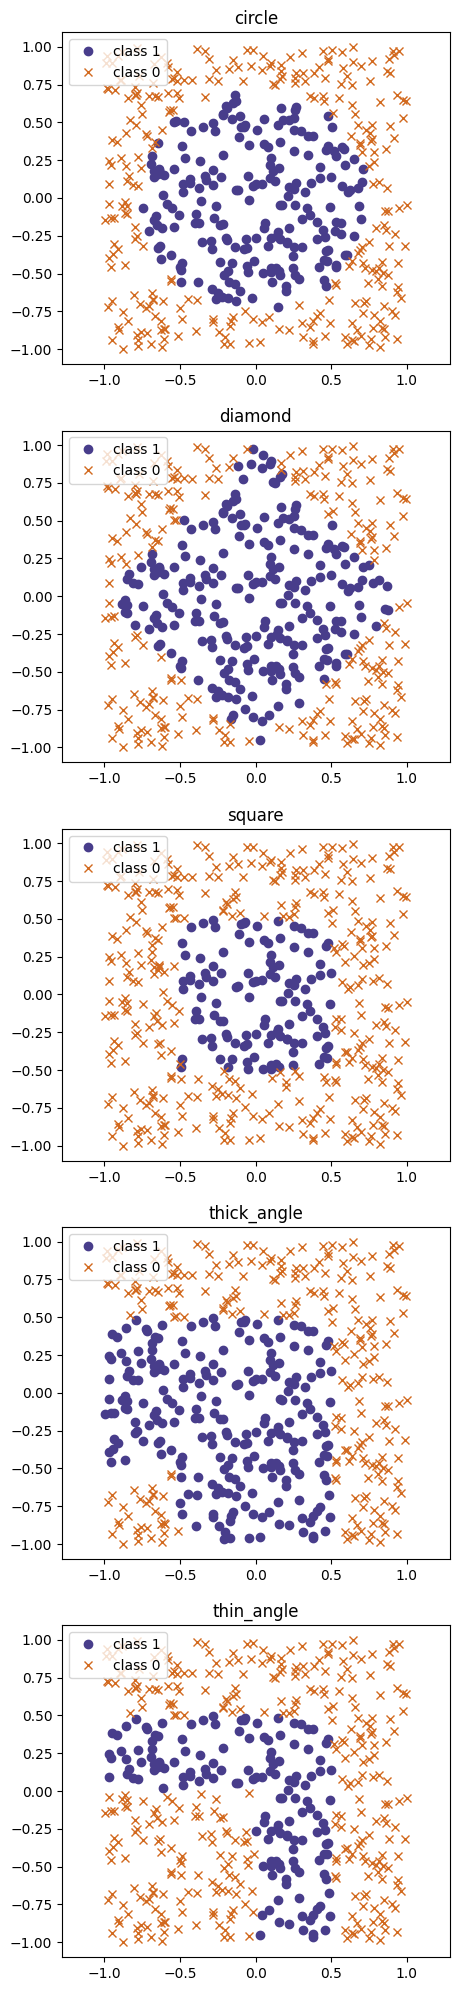

In [58]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
y_cricle = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y_diamond = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
y_square = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
y_thick_angle = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
y_thin_angle = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)

y = [y_cricle, y_diamond, y_square, y_thick_angle, y_thin_angle]
y_labels = ["circle", "diamond", "square", "thick_angle", "thin_angle"]

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y[0].shape))

fig, ax = plt.subplots(len(y), figsize=(5, 25))
for i, ax in enumerate(ax):
  ax.set_title(y_labels[i])
  ax.plot(x_mat_full[y[i]==1, 0],x_mat_full[y[i]==1, 1], 'o', label='class 1', color='darkslateblue')
  ax.plot(x_mat_full[y[i]==0, 0],x_mat_full[y[i]==0, 1], 'x', label='class 0', color='chocolate')
  # ax.grid(True)
  ax.legend(loc='best')
  ax.axis('equal');

Here are some helper functions

In [59]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y_obj
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y_obj + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies, title=None):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations -- {}'.format(title), fontsize=16)
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

Complete the pseudocode below

Learning rate: 0.001, Y_Obj: circle
Iteration: 0, Loss: 0.7346859771551226, Accuracy: 0.576
Iteration: 200, Loss: 0.6751443968919776, Accuracy: 0.576
Iteration: 400, Loss: 0.6611820481887161, Accuracy: 0.526
Iteration: 600, Loss: 0.6137916473449002, Accuracy: 0.642
Iteration: 800, Loss: 0.5437888590654454, Accuracy: 0.736
Learning rate: 0.01, Y_Obj: circle
Iteration: 0, Loss: 0.7346859771551226, Accuracy: 0.576
Iteration: 200, Loss: 0.22289653112383814, Accuracy: 0.938
Iteration: 400, Loss: 0.22800918520758143, Accuracy: 0.882
Iteration: 600, Loss: 0.21413606275497307, Accuracy: 0.882
Iteration: 800, Loss: 0.2118415181273412, Accuracy: 0.88
Learning rate: 0.1, Y_Obj: circle
Iteration: 0, Loss: 0.7346859771551226, Accuracy: 0.576
Iteration: 200, Loss: 0.5949189882892606, Accuracy: 0.576
Iteration: 400, Loss: 0.5915658916255674, Accuracy: 0.576
Iteration: 600, Loss: 0.590702777938529, Accuracy: 0.576
Iteration: 800, Loss: 0.5902560427087303, Accuracy: 0.576


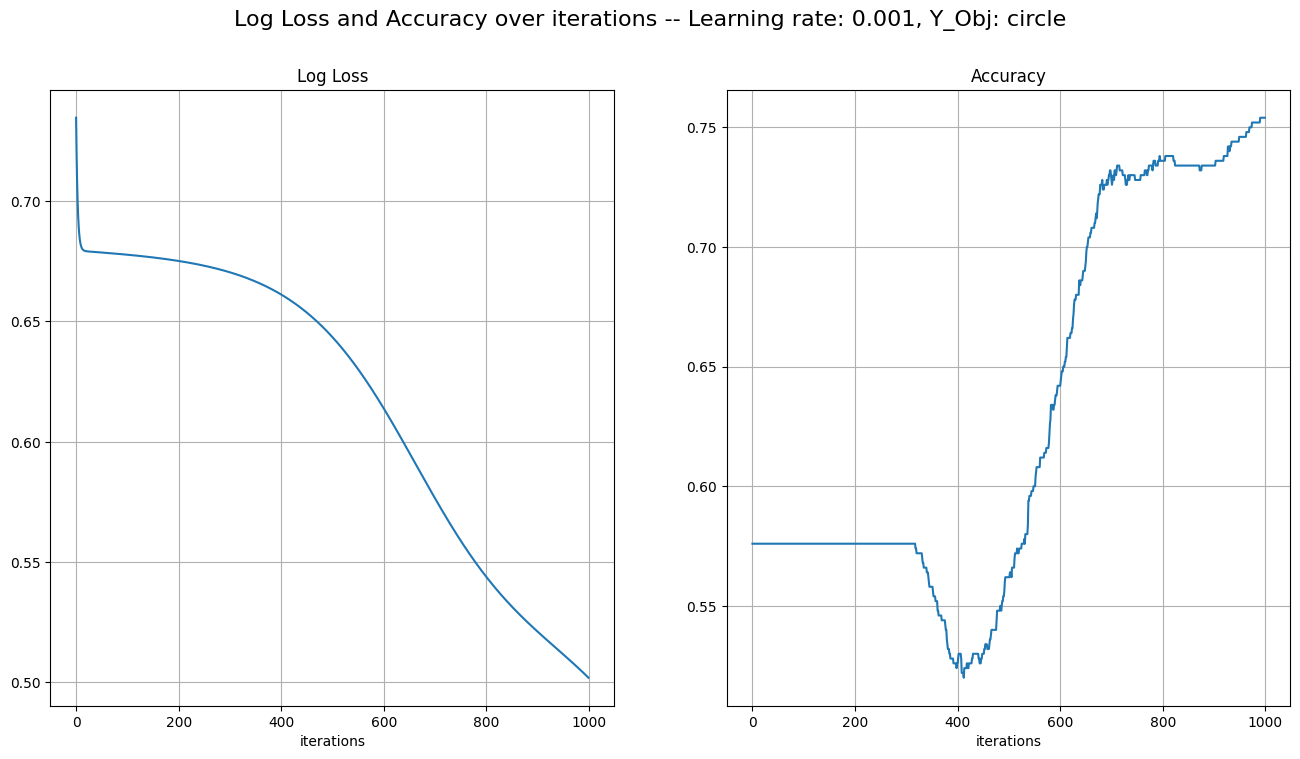

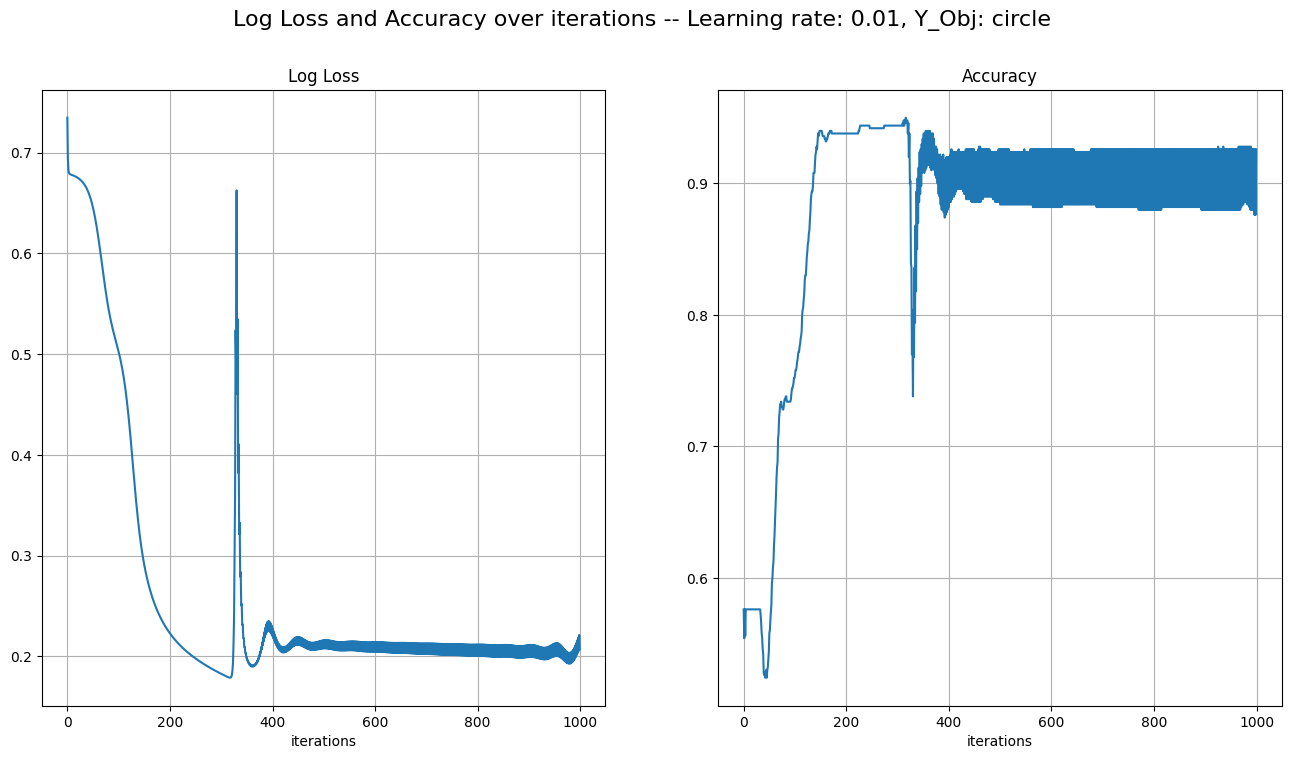

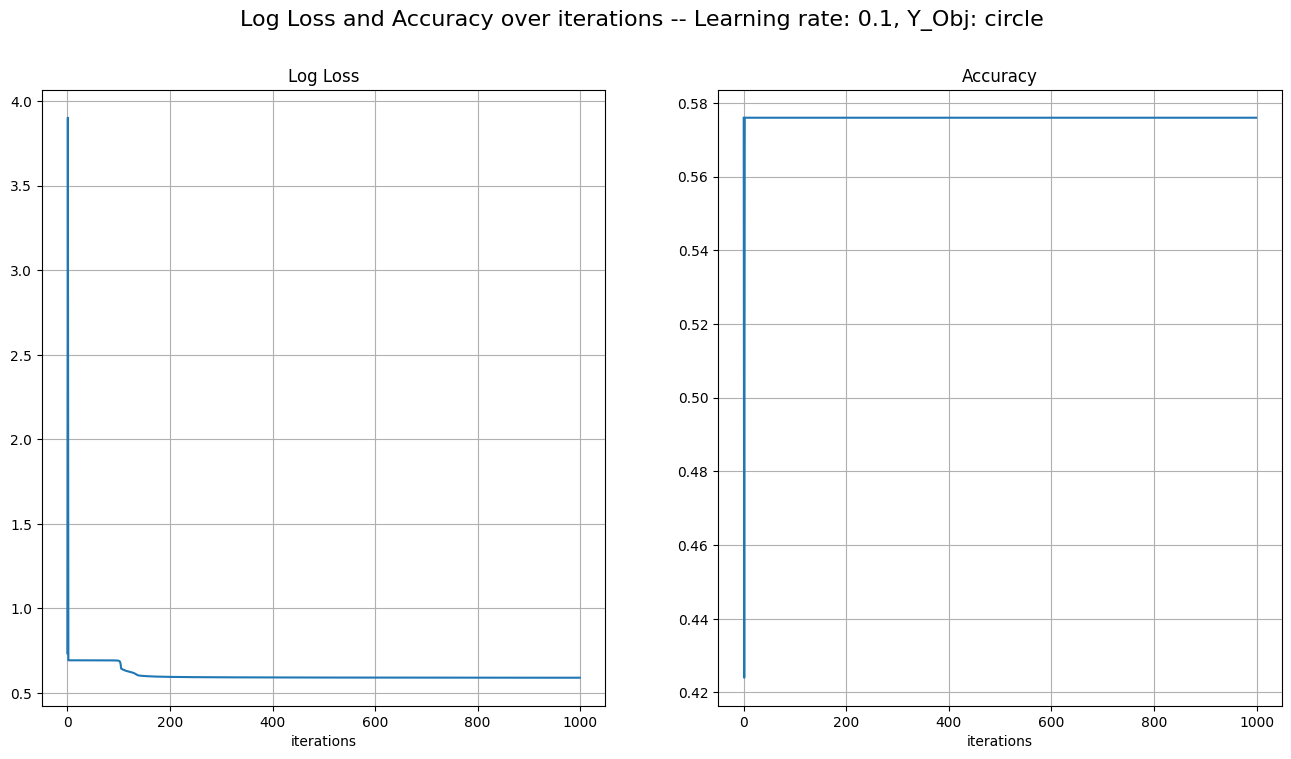

In [60]:
#### Initialize the network parameters

np.random.seed(1241)

W1 = np.random.uniform(-1,1,size = (3,4))
W2 = np.random.uniform(-1,1,4)
num_iter = 1000
learning_rate =[0.001, 0.01, 0.1] 
x_mat = x_mat_full
y_obj = y[0]

for lr in learning_rate:
    print("Learning rate: {}, Y_Obj: {}".format(lr, y_labels[0]))
    loss_vals, accuracies = [], []
    W_1, W_2 = W1.copy(), W2.copy()
    for i in range(num_iter):
        ### Do a forward computation, and get the gradient
        y_pred, gradient = forward_pass(W_1, W_2)    
        ## Update the weight matrices
        W_1 = W_1 - lr*gradient[0]
        W_2 = W_2 - lr*gradient[1]
        ### Compute the loss and accuracy
        loss_vals.append(loss_fn(y_obj, y_pred))
        accuracies.append(metrics.accuracy_score(y_obj, np.round(y_pred), normalize=True))
        ## Print the loss and accuracy for every 200th iteration
        if i%200==0:
            print("Iteration: {}, Loss: {}, Accuracy: {}".format(i, loss_vals[-1], accuracies[-1]))
    plot_loss_accuracy(loss_vals, accuracies, title='Learning rate: {}, Y_Obj: {}'.format(lr, y_labels[0]))

Learning rate: 0.001, Y_Obj: diamond
Iteration: 0, Loss: 0.7975826880698722, Accuracy: 0.514
Iteration: 200, Loss: 0.6876523953232572, Accuracy: 0.52
Iteration: 400, Loss: 0.6744146383400058, Accuracy: 0.612
Iteration: 600, Loss: 0.6249661836884273, Accuracy: 0.724
Iteration: 800, Loss: 0.5531046148184896, Accuracy: 0.746
Learning rate: 0.01, Y_Obj: diamond
Iteration: 0, Loss: 0.7975826880698722, Accuracy: 0.514
Iteration: 200, Loss: 0.3017594714802591, Accuracy: 0.9
Iteration: 400, Loss: 0.1620798183512163, Accuracy: 0.968
Iteration: 600, Loss: 0.1355011610321072, Accuracy: 0.986
Iteration: 800, Loss: 0.12292515637292549, Accuracy: 0.984
Learning rate: 0.1, Y_Obj: diamond
Iteration: 0, Loss: 0.7975826880698722, Accuracy: 0.514
Iteration: 200, Loss: 0.6931579930524601, Accuracy: 0.486
Iteration: 400, Loss: 0.693154634136082, Accuracy: 0.486
Iteration: 600, Loss: 0.6931531730874526, Accuracy: 0.486
Iteration: 800, Loss: 0.6931523423426013, Accuracy: 0.486


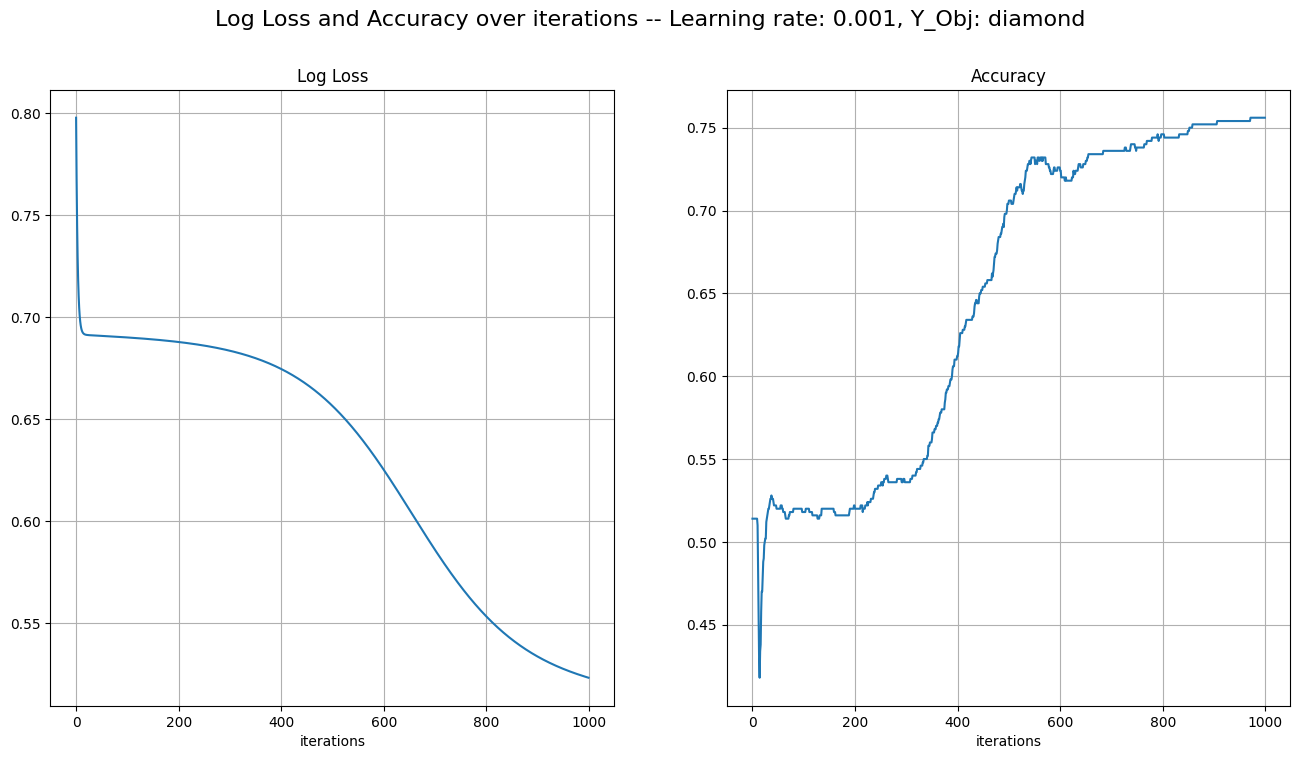

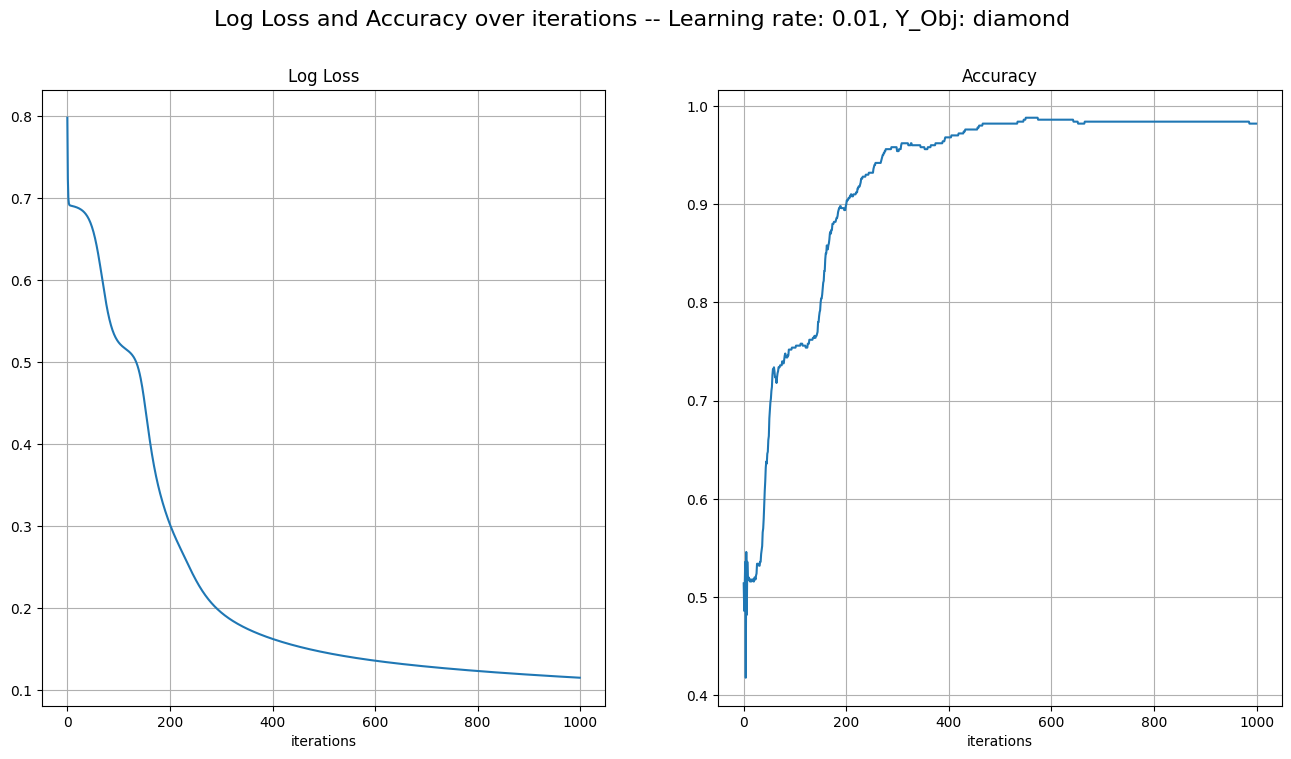

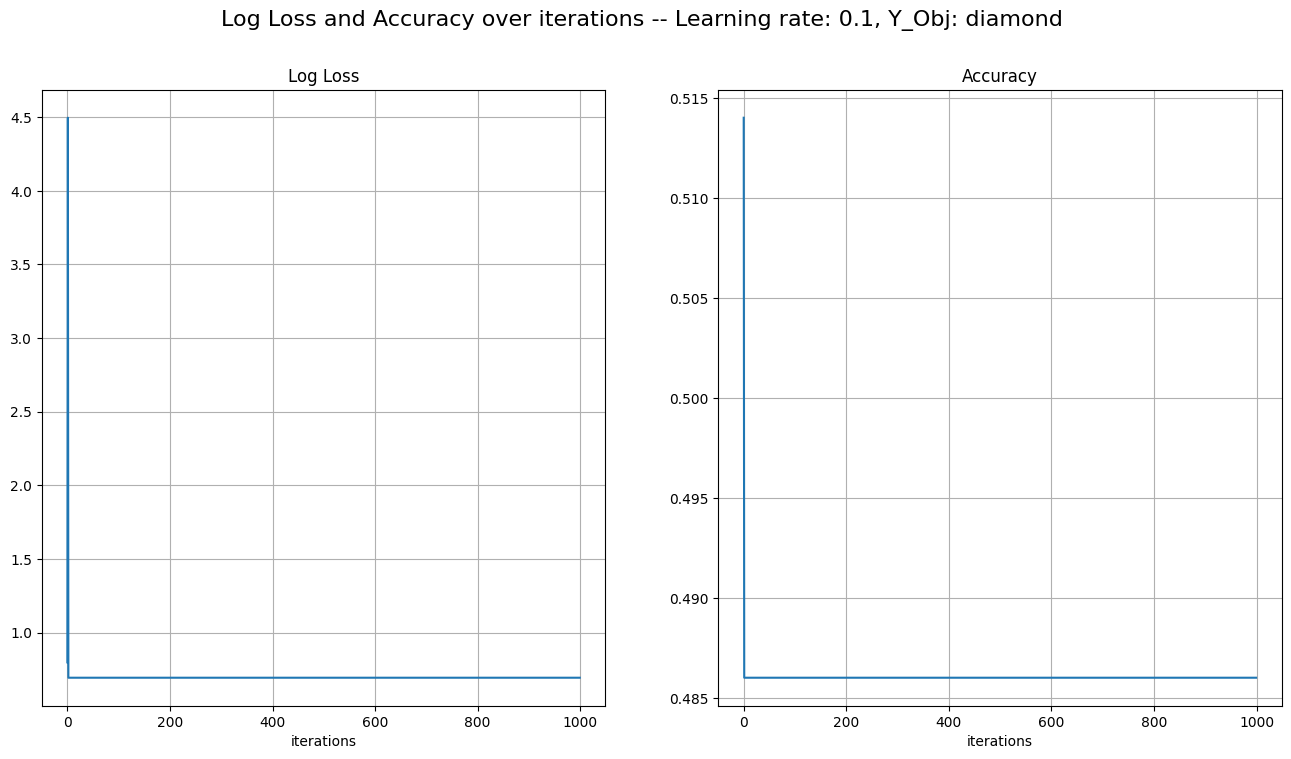

In [61]:
#### Initialize the network parameters

np.random.seed(1241)

W1 = np.random.uniform(-1,1,size = (3,4))
W2 = np.random.uniform(-1,1,4)
num_iter = 1000
learning_rate =[0.001, 0.01, 0.1] 
x_mat = x_mat_full
y_obj = y[1]

for lr in learning_rate:
    print("Learning rate: {}, Y_Obj: {}".format(lr, y_labels[1]))
    loss_vals, accuracies = [], []
    W_1, W_2 = W1.copy(), W2.copy()
    for i in range(num_iter):
        ### Do a forward computation, and get the gradient
        y_pred, gradient = forward_pass(W_1, W_2)    
        ## Update the weight matrices
        W_1 = W_1 - lr*gradient[0]
        W_2 = W_2 - lr*gradient[1]
        ### Compute the loss and accuracy
        loss_vals.append(loss_fn(y_obj, y_pred))
        accuracies.append(metrics.accuracy_score(y_obj, np.round(y_pred), normalize=True))
        ## Print the loss and accuracy for every 200th iteration
        if i%200==0:
            print("Iteration: {}, Loss: {}, Accuracy: {}".format(i, loss_vals[-1], accuracies[-1]))
    plot_loss_accuracy(loss_vals, accuracies, title='Learning rate: {}, Y_Obj: {}'.format(lr, y_labels[1]))

Learning rate: 0.001, Y_Obj: square
Iteration: 0, Loss: 0.5517713094502417, Accuracy: 0.762
Iteration: 200, Loss: 0.5462260412231592, Accuracy: 0.762
Iteration: 400, Loss: 0.5408942845862039, Accuracy: 0.762
Iteration: 600, Loss: 0.5235027657370541, Accuracy: 0.762
Iteration: 800, Loss: 0.4779587050305195, Accuracy: 0.762
Learning rate: 0.01, Y_Obj: square
Iteration: 0, Loss: 0.5517713094502417, Accuracy: 0.762
Iteration: 200, Loss: 0.23822623400074439, Accuracy: 0.928
Iteration: 400, Loss: 0.1428518356346632, Accuracy: 0.942
Iteration: 600, Loss: 0.12955746300541557, Accuracy: 0.946
Iteration: 800, Loss: 0.12237916632611044, Accuracy: 0.946
Learning rate: 0.1, Y_Obj: square
Iteration: 0, Loss: 0.5517713094502417, Accuracy: 0.762
Iteration: 200, Loss: 0.6932419787970986, Accuracy: 0.238
Iteration: 400, Loss: 0.6928184995733901, Accuracy: 0.762
Iteration: 600, Loss: 0.6932441866614933, Accuracy: 0.238
Iteration: 800, Loss: 0.6931898372586835, Accuracy: 0.238


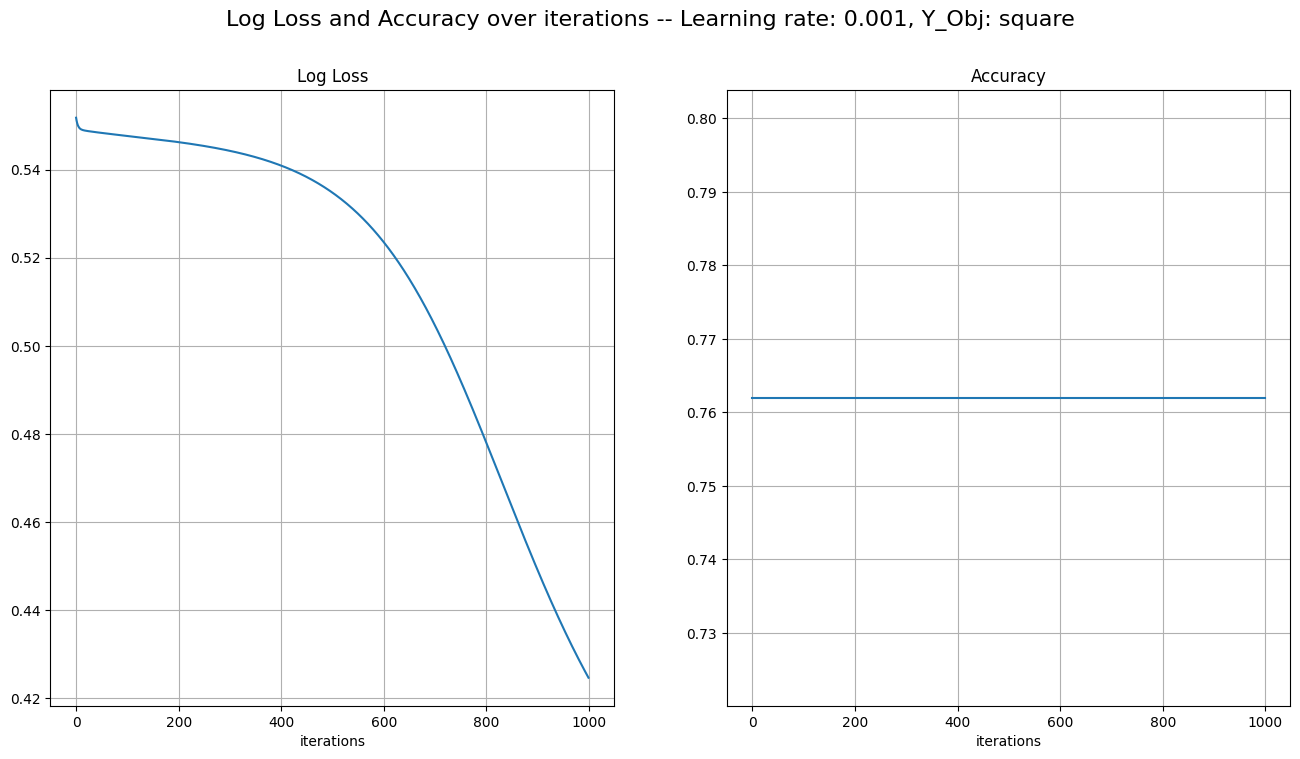

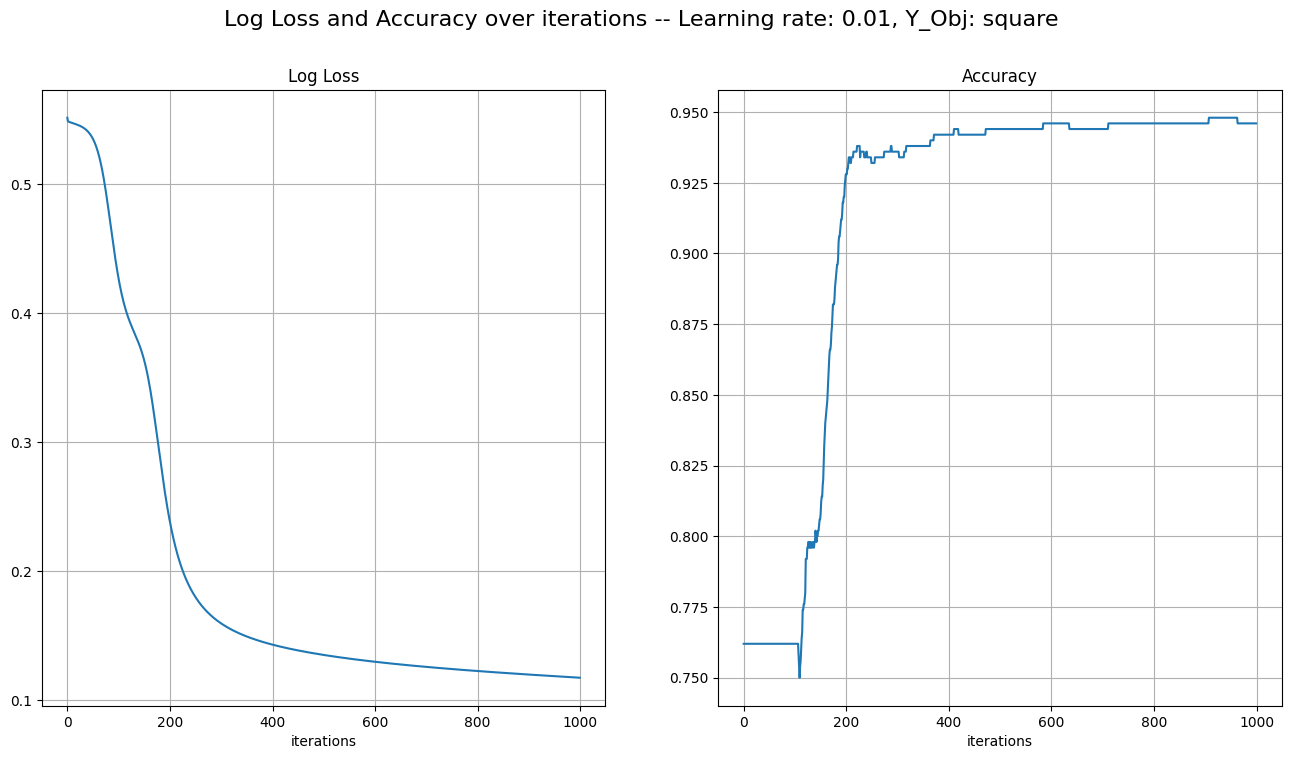

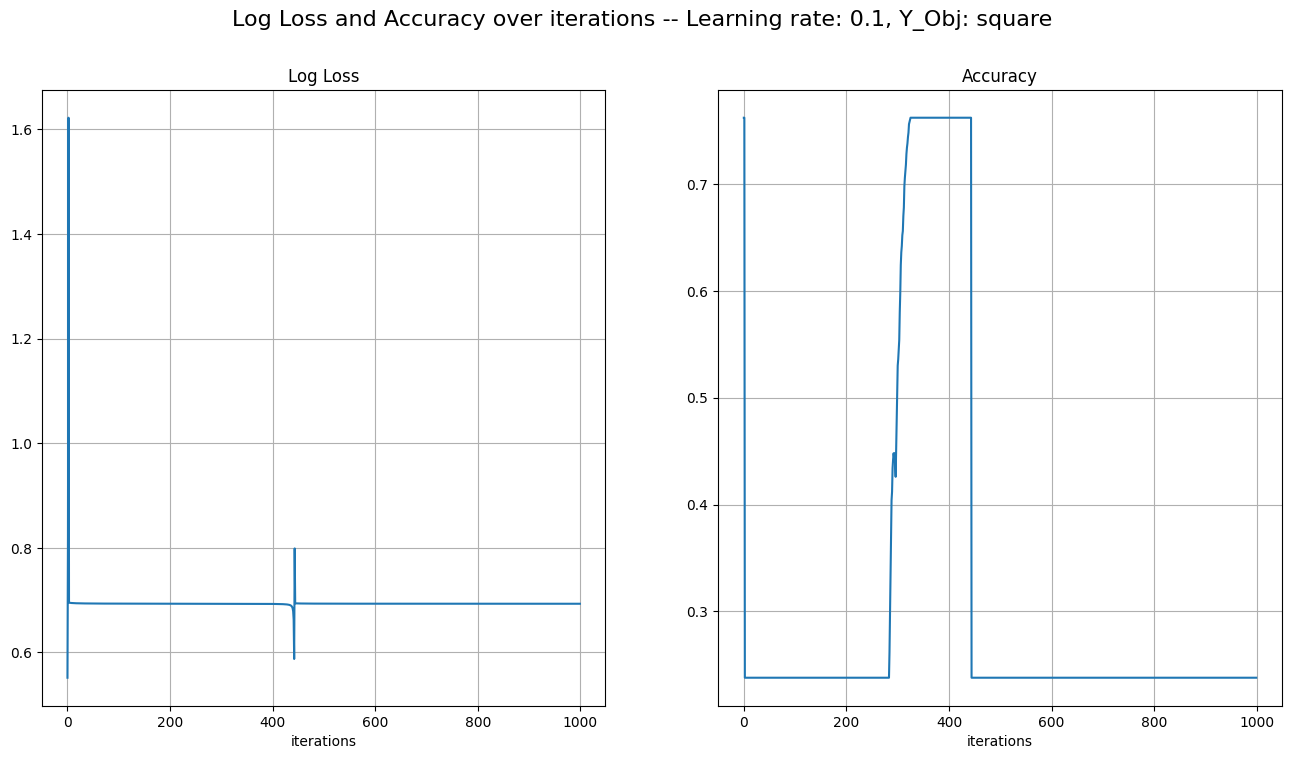

In [62]:
#### Initialize the network parameters

np.random.seed(1241)

W1 = np.random.uniform(-1,1,size = (3,4))
W2 = np.random.uniform(-1,1,4)
num_iter = 1000
learning_rate =[0.001, 0.01, 0.1] 
x_mat = x_mat_full
y_obj = y[2]

for lr in learning_rate:
    print("Learning rate: {}, Y_Obj: {}".format(lr, y_labels[2]))
    loss_vals, accuracies = [], []
    W_1, W_2 = W1.copy(), W2.copy()
    for i in range(num_iter):
        ### Do a forward computation, and get the gradient
        y_pred, gradient = forward_pass(W_1, W_2)    
        ## Update the weight matrices
        W_1 = W_1 - lr*gradient[0]
        W_2 = W_2 - lr*gradient[1]
        ### Compute the loss and accuracy
        loss_vals.append(loss_fn(y_obj, y_pred))
        accuracies.append(metrics.accuracy_score(y_obj, np.round(y_pred), normalize=True))
        ## Print the loss and accuracy for every 200th iteration
        if i%200==0:
            print("Iteration: {}, Loss: {}, Accuracy: {}".format(i, loss_vals[-1], accuracies[-1]))
    plot_loss_accuracy(loss_vals, accuracies, title='Learning rate: {}, Y_Obj: {}'.format(lr, y_labels[2]))

Learning rate: 0.001, Y_Obj: thick_angle
Iteration: 0, Loss: 0.7734581388545002, Accuracy: 0.518
Iteration: 200, Loss: 0.5381561686727854, Accuracy: 0.738
Iteration: 400, Loss: 0.5115027542470918, Accuracy: 0.752
Iteration: 600, Loss: 0.4700781551338678, Accuracy: 0.816
Iteration: 800, Loss: 0.416490205815346, Accuracy: 0.874
Learning rate: 0.01, Y_Obj: thick_angle
Iteration: 0, Loss: 0.7734581388545002, Accuracy: 0.518
Iteration: 200, Loss: 0.14602218039267137, Accuracy: 0.968
Iteration: 400, Loss: 0.08225435565273743, Accuracy: 0.984
Iteration: 600, Loss: 0.06877380396807871, Accuracy: 0.984
Iteration: 800, Loss: 0.062387070983631374, Accuracy: 0.984
Learning rate: 0.1, Y_Obj: thick_angle
Iteration: 0, Loss: 0.7734581388545002, Accuracy: 0.518
Iteration: 200, Loss: 0.6931405837358133, Accuracy: 0.492
Iteration: 400, Loss: 0.6931388565760781, Accuracy: 0.494
Iteration: 600, Loss: 0.6931362473003159, Accuracy: 0.496
Iteration: 800, Loss: 0.6931316911411664, Accuracy: 0.516


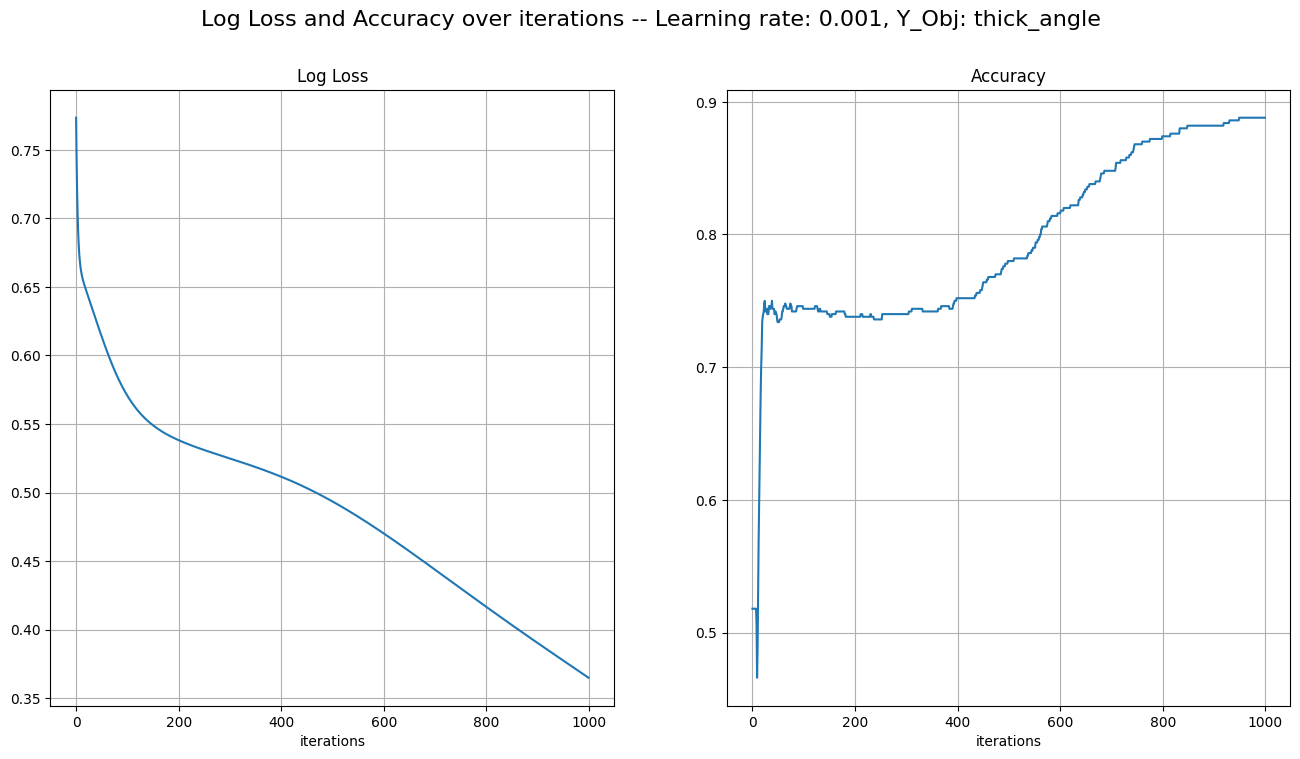

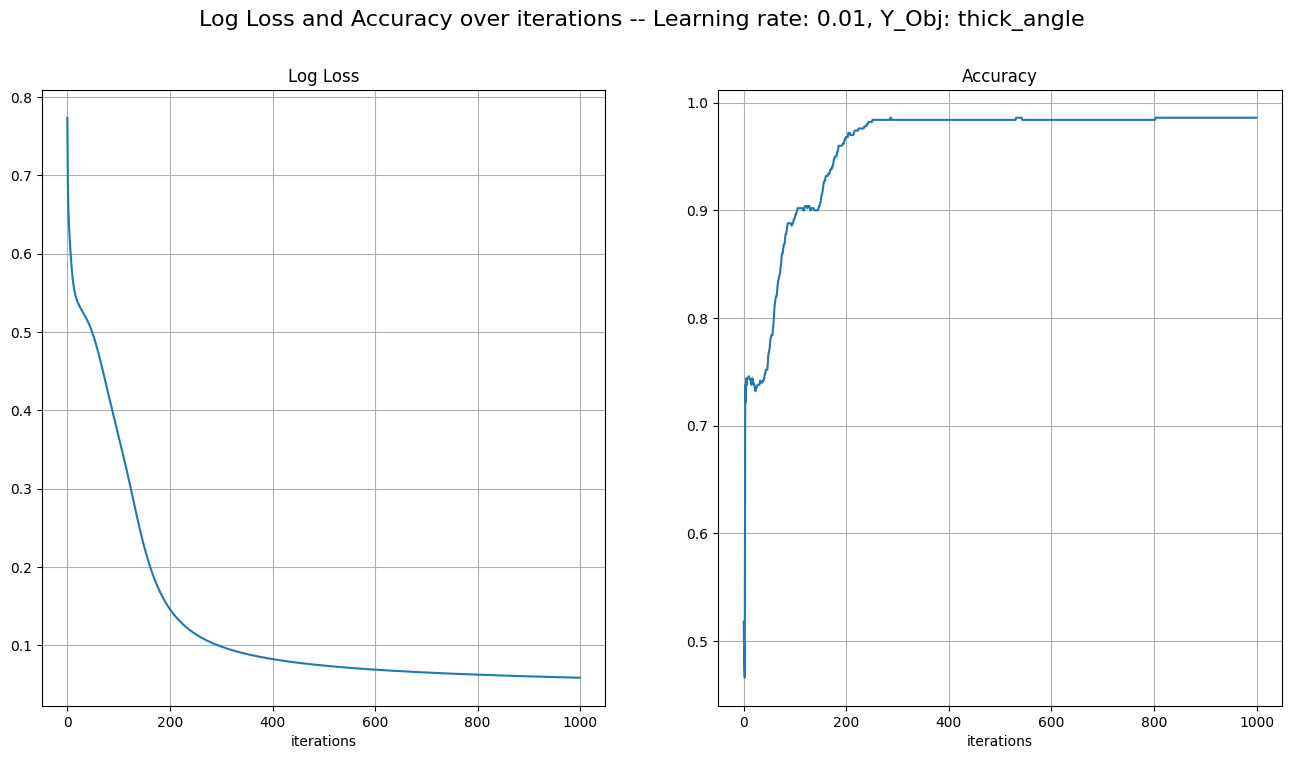

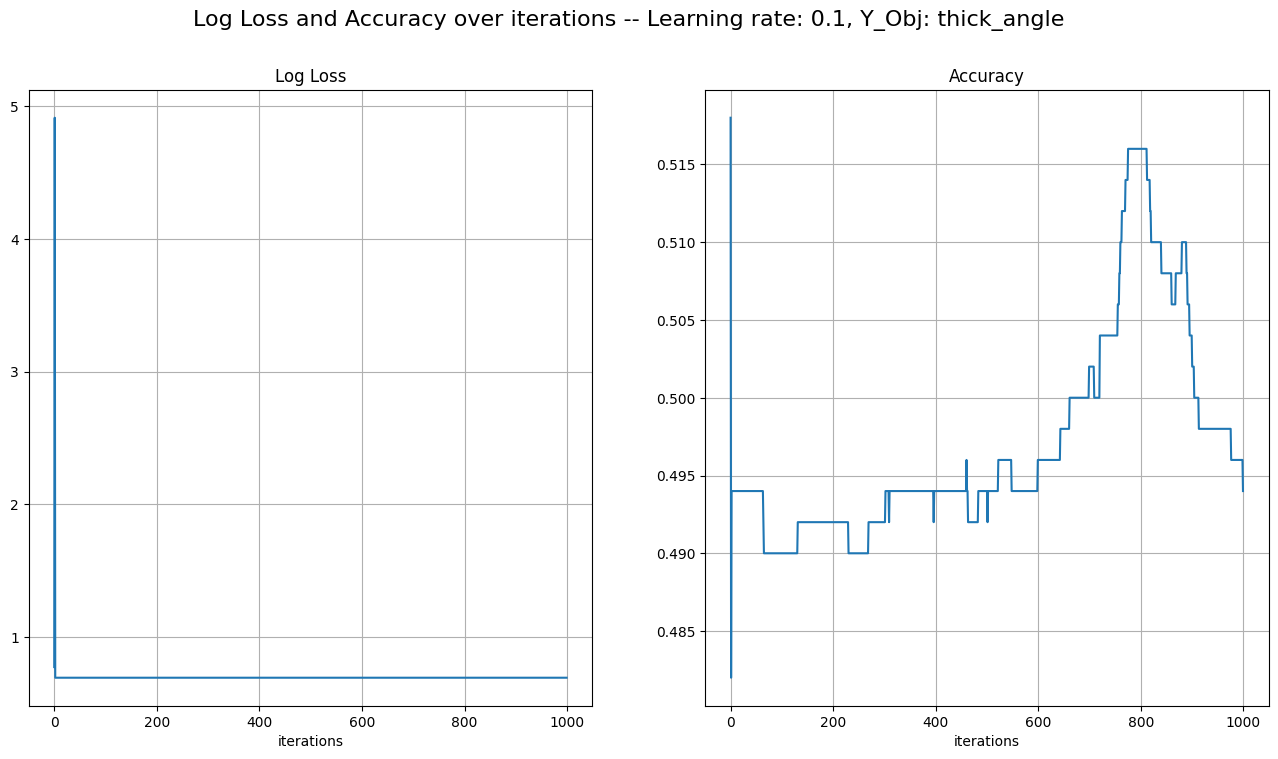

In [63]:
#### Initialize the network parameters

np.random.seed(1241)

W1 = np.random.uniform(-1,1,size = (3,4))
W2 = np.random.uniform(-1,1,4)
num_iter = 1000
learning_rate =[0.001, 0.01, 0.1] 
x_mat = x_mat_full
y_obj = y[3]

for lr in learning_rate:
    print("Learning rate: {}, Y_Obj: {}".format(lr, y_labels[3]))
    loss_vals, accuracies = [], []
    W_1, W_2 = W1.copy(), W2.copy()
    for i in range(num_iter):
        ### Do a forward computation, and get the gradient
        y_pred, gradient = forward_pass(W_1, W_2)    
        ## Update the weight matrices
        W_1 = W_1 - lr*gradient[0]
        W_2 = W_2 - lr*gradient[1]
        ### Compute the loss and accuracy
        loss_vals.append(loss_fn(y_obj, y_pred))
        accuracies.append(metrics.accuracy_score(y_obj, np.round(y_pred), normalize=True))
        ## Print the loss and accuracy for every 200th iteration
        if i%200==0:
            print("Iteration: {}, Loss: {}, Accuracy: {}".format(i, loss_vals[-1], accuracies[-1]))
    plot_loss_accuracy(loss_vals, accuracies, title='Learning rate: {}, Y_Obj: {}'.format(lr, y_labels[3]))

Learning rate: 0.001, Y_Obj: thin_angle
Iteration: 0, Loss: 0.6129468249962783, Accuracy: 0.698
Iteration: 200, Loss: 0.6057432177030805, Accuracy: 0.698
Iteration: 400, Loss: 0.5967275753164295, Accuracy: 0.698
Iteration: 600, Loss: 0.5803102436190775, Accuracy: 0.698
Iteration: 800, Loss: 0.5561189937931513, Accuracy: 0.698
Learning rate: 0.01, Y_Obj: thin_angle
Iteration: 0, Loss: 0.6129468249962783, Accuracy: 0.698
Iteration: 200, Loss: 0.3927083100667473, Accuracy: 0.852
Iteration: 400, Loss: 0.1520961316762318, Accuracy: 0.97
Iteration: 600, Loss: 0.09742915733224379, Accuracy: 0.976
Iteration: 800, Loss: 0.07844179254170154, Accuracy: 0.98
Learning rate: 0.1, Y_Obj: thin_angle
Iteration: 0, Loss: 0.6129468249962783, Accuracy: 0.698
Iteration: 200, Loss: 0.5870521510375734, Accuracy: 0.698
Iteration: 400, Loss: 0.5865145973756576, Accuracy: 0.698
Iteration: 600, Loss: 0.5863802426979845, Accuracy: 0.698
Iteration: 800, Loss: 0.5863317407854465, Accuracy: 0.698


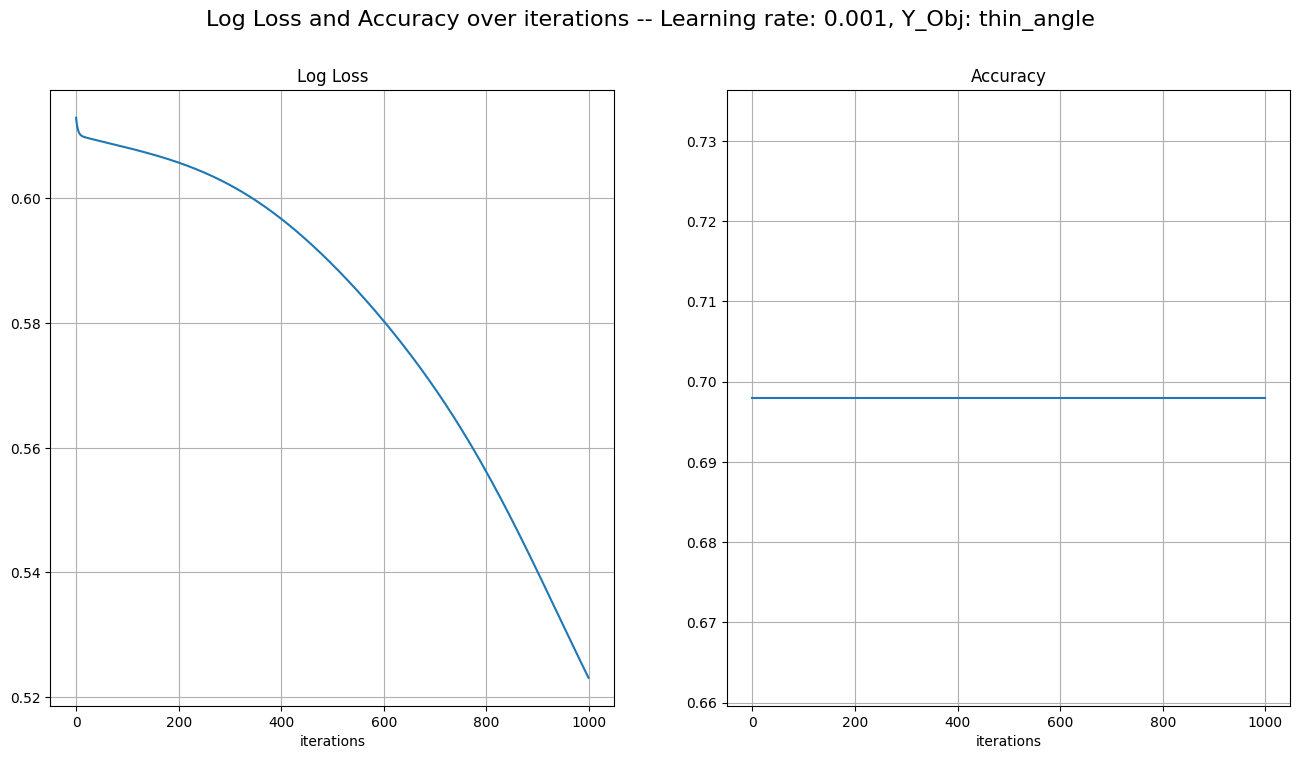

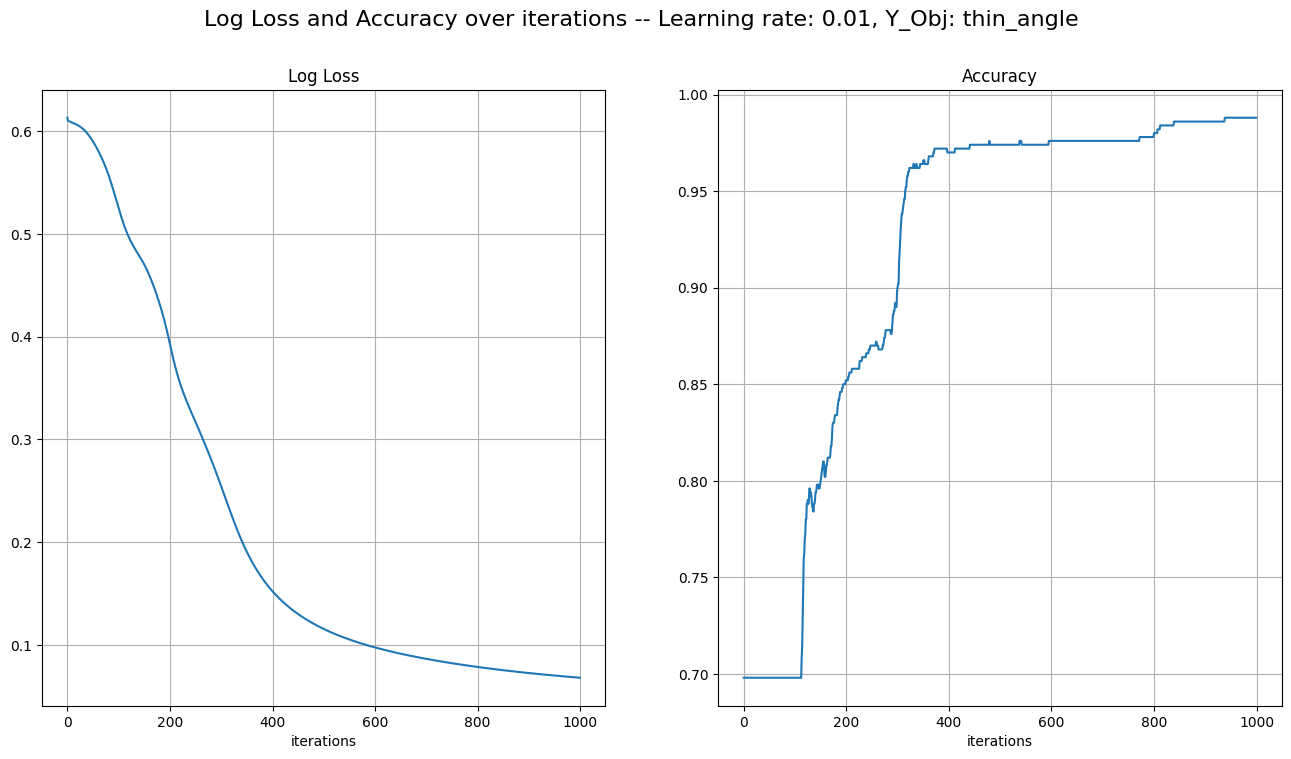

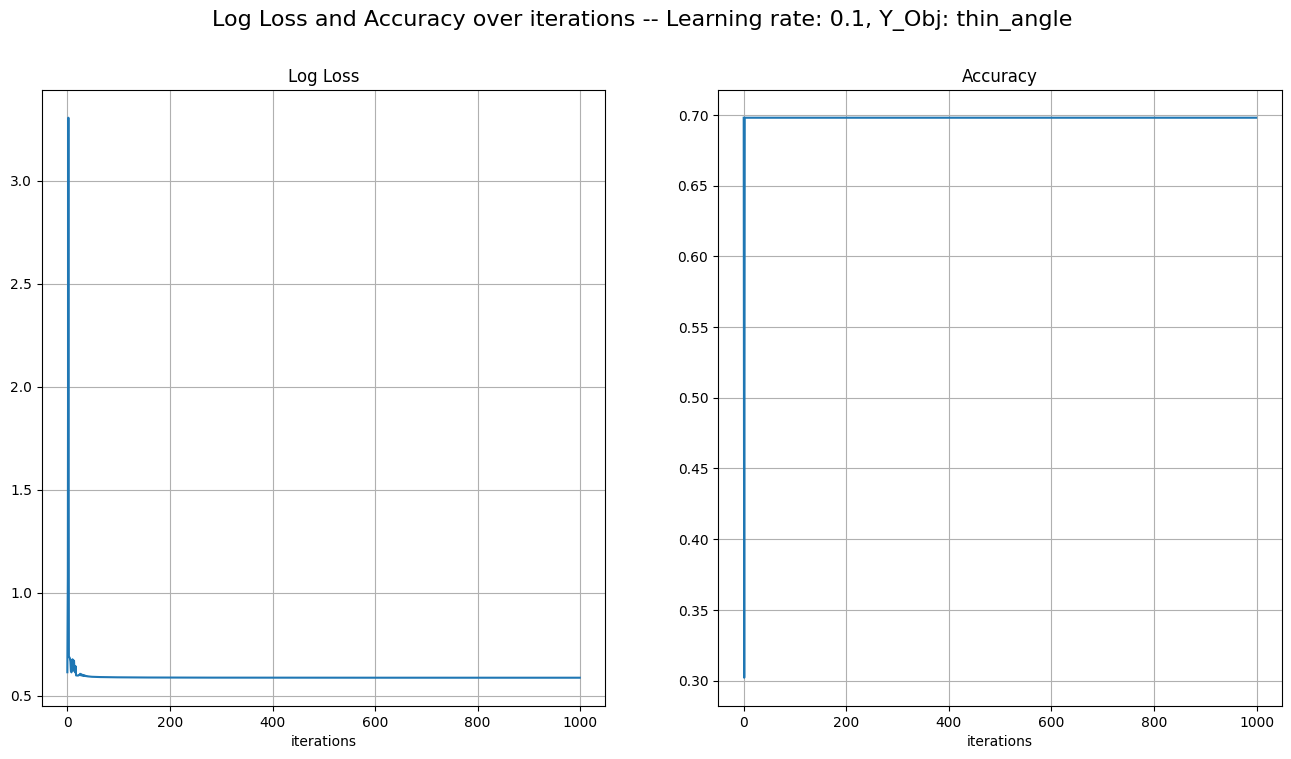

In [64]:
#### Initialize the network parameters

np.random.seed(1241)

W1 = np.random.uniform(-1,1,size = (3,4))
W2 = np.random.uniform(-1,1,4)
num_iter = 1000
learning_rate =[0.001, 0.01, 0.1] 
x_mat = x_mat_full
y_obj = y[4]

for lr in learning_rate:
    print("Learning rate: {}, Y_Obj: {}".format(lr, y_labels[4]))
    loss_vals, accuracies = [], []
    W_1, W_2 = W1.copy(), W2.copy()
    for i in range(num_iter):
        ### Do a forward computation, and get the gradient
        y_pred, gradient = forward_pass(W_1, W_2)    
        ## Update the weight matrices
        W_1 = W_1 - lr*gradient[0]
        W_2 = W_2 - lr*gradient[1]
        ### Compute the loss and accuracy
        loss_vals.append(loss_fn(y_obj, y_pred))
        accuracies.append(metrics.accuracy_score(y_obj, np.round(y_pred), normalize=True))
        ## Print the loss and accuracy for every 200th iteration
        if i%200==0:
            print("Iteration: {}, Loss: {}, Accuracy: {}".format(i, loss_vals[-1], accuracies[-1]))
    plot_loss_accuracy(loss_vals, accuracies, title='Learning rate: {}, Y_Obj: {}'.format(lr, y_labels[4]))

* Circle

No circulo, a melhor taxa de aprendizado é a 0.01, com 1000 iterações. Em 0.01 notamos um ruído muito grande no erro e na acurácia, o que torna impreciso o resultado, apesar de que a acurácia foi a mais alta e o erro o mais baixo. Já em 0.001, observa-se que o erro obtido foi muito alto e a acurácia ficou por volta dos 75%. Neste último, o aumento do número de iterações poderia ter auxiliado na melhora do aprendizado, uma vez que este está convergindo lentamente. Por fim, em 0.1, nota-se que a rede obteve um erro muito alto e a acurácia muito baixa, além da convêrgencia brusca nas primeiras iterações .


* Diamond

Assim como no círculo, a melhor taxa de aprendizado foi 0.01. Neste obteve-se o erro baixo e a acurácia alta, o que demonstra que a rede conseguiu treinar eficientemente. Em 0.001, o erro foi muito alto e a acurácia muito baixa, o que demonstra que a rede não conseguiu aprender no número de iterações, já que está convergindo lentamente. Em 0.1, o erro foi muito alto e a acurácia muito baixa, o que demonstra que a rede não conseguiu aprender, além da convêrgencia brusca nas primeiras iterações.

* Square

O melhor foi o 0.01. Neste, observa-se baixo erro e alta acurácia, o que demonstra que a rede aprendeu com sucesso. Em 0.001, o erro foi alto e acurácia se manteve constante, o que demonstra que a rede não aprendeu. Em 0.1, o erro foi alto e a acurácia muito baixa, o que demonstra que a rede não aprendeu, além da convêrgencia brusca nas primeiras iterações e das divergencias durante o aumento do número de iterações.

* Thick Angle

Nesta obteve-se resultados próximos para as taxas 0.001 e 0.01, porém a 0.01 ainda é a campeã. Isto acontece devido ao aprendizado mais rápido, o menor erro e a maior acurácia. Em 0.001 há a tendencia do erro abaixar caso houvesse mais iterações e a acurácia já havia obtido um resultado alto. Em 0.1 nota-se o decaímento extremamente brusco do erro, porém ainda se mantendo alto, e uma divergência no resultado da acurácia.

* Thin Angle

0.01 foi a melhor taxa de aprendizado, pois obteve o menor erro e a maior acurácia. 0.001 obteve erro alto e acurácia constante, o que demonstra que a rede não funcionou corretamente. Por fim, 0.1, onde o resultado obtido foi o pior, com erro alto e acurácia baixa, além da convêrgencia brusca nas primeiras iterações.

**Conclusão geral**

* A melhor taxa em todos os objetos foi 0.01, portanto conclui-se que esta é a melhor taxa para se utliizar nas redes neurais com estes dados aprensentados.
* 0.1 sempre obteve um valor muito distante, o tornando o pior candidato.
* 0.001 obteve resultados satisfatórios, porém poderiam ser melhorados caso utliizasse-se um número maior de iterações devido a sua convergência lenta.